In [166]:
# -*- coding: utf-8 -*-
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Task 1

Here, your features X follow some 2D multivariate Gaussian distribution with mean D.

Try PCA where the code dim l = 2 & visualize the PC vectors with your features. How do they look like? What can you say about this Gaussian distribution? Discuss.

## 1.1 Data loading

In [167]:
f_value = np.loadtxt("f_value.txt", delimiter=",") #dataload

In [168]:
print(f_value.shape) #Dimension of the data

(10000, 2)


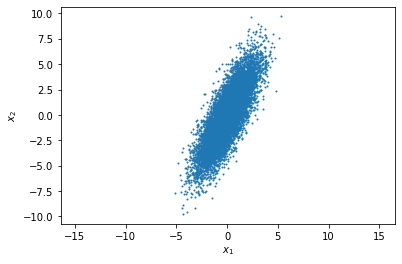

In [169]:
#Plot data
plt.scatter(f_value[:, 0], f_value[:, 1], s=1)
plt.axis("equal")
# plt.xlim(-10, 10)
# plt.ylim(-10, 10)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [170]:
f_value

array([[-0.439342,  1.679144],
       [-0.411829, -0.947212],
       [ 2.128724,  4.05885 ],
       ...,
       [-0.371318, -3.803191],
       [-0.31022 , -2.302803],
       [ 1.919582,  5.852776]])

In [171]:
#Axis-aware mean
def mean(x, axis=None):
    if axis is not None:
        axis_len = x.shape[0]
        mean = np.array([])
        axis_sum = np.sum(x, axis=axis)
        axis_mean = axis_sum / axis_len
        mean = np.append(mean, axis_mean)
        return mean
    else:
        return x.sum()/x.size

In [172]:
#std implementation from scratch
def std(x, axis=None):
    if axis is None:
        x_mean = mean(x)
        return np.sqrt(np.sum((x-x_mean)**2)/(x.size-1))
    else:
        x_mean = mean(x, axis_=axis)
        return np.sqrt(np.sum((x- x_mean)**2, axis=axis)/(x.shape[0]-1))

In [173]:
# simple normalization (no sign change)
data = (f_value - np.mean(f_value)) / (np.std(f_value, axis=0))

In [174]:
#Axis-aware L2 normalization implementation (sign change)

def normalize_(x, axis=None):
    min = np.amin(x)
    x += x
    if axis is not None:
        l2_norm = np.sqrt(np.sum(x * x, axis=axis))
        return x / l2_norm
    else:
        l2_norm = np.sqrt(np.sum(x * x))
        return x / l2_norm(x)

## 1.2 PCA

In [175]:
# SVD method
# data: [num_data, feature dimension]
def pca(data, n_components=2,method='svd'):
    vals, vecs = None, None
    if method == 'svd':
        #Caclulating SVD
        U,S,Vt = np.linalg.svd(data, full_matrices=False, compute_uv=True)
        vals = np.square(S) / (data.shape[0] - 1)
        vecs = Vt[:n_components]
    else:
        # eigendecomposition method
        cov = np.dot(data.T, data)
        vals, vecs = np.linalg.eig(cov)
        vecs = vecs[:n_components]
    """
    print(f'vals:{vals}')
    print(f'vecs:{vecs}')
    """
    return vals, vecs

In [176]:
vals, vecs = pca(data)

## 1.3 Visualize PC vectors

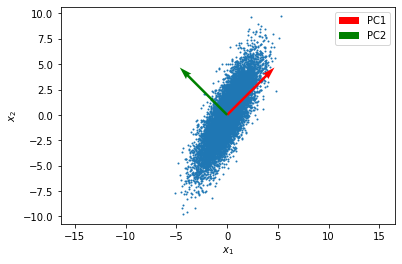

In [177]:
plt.scatter(f_value[:, 0], f_value[:, 1], s=1)
plt.axis("equal")
# plt.xlim(-10, 10)
# plt.ylim(-10, 10)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
origin_pt = np.array([0,0])
plt.quiver(*origin_pt, vecs[0,0], vecs[0,1], color='r', scale=5, label='PC1')
plt.quiver(*origin_pt, vecs[1,0], vecs[1,1], color='g', scale=5, label='PC2')
plt.legend()
plt.show()

# Task 2 : What happens if your X has nonlinearity?

In [178]:
# data generation
x_21 = np.random.uniform(-10, 10, 1000)
y_21 = x_21 * 2 + np.random.normal(0,1,1000) # add gaussian noise

x_22 = np.random.uniform(-10, 10, 1000)
y_22 = x_22 ** 2 + np.random.normal(0,1,1000) # add gaussian noise

In [179]:
# PCA
vals_21, vecs_21 = pca(data)
vals_22, vecs_22 = pca(data)

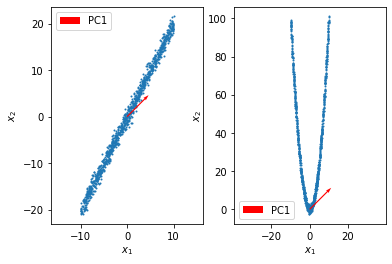

In [180]:
# visualization
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.scatter(x_21, y_21, s=1)
ax1.axis("equal")
# plt.xlim(-10, 10)
# plt.ylim(-10, 10)
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.quiver(*origin_pt, vecs_21[0,0], vecs_21[0,1], color='r', scale=5, label='PC1')
ax1.legend()

ax2.scatter(x_22, y_22, s=1)
ax2.axis("equal")
# plt.xlim(-10, 10)
# plt.ylim(-10, 10)
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.quiver(*origin_pt, vecs_22[0,0], vecs_22[0,1], color='r', scale=5, label='PC1')
ax2.legend()

plt.show()

# Q3. AE & PCA
A single layered AE with a linear activation function is in fact AE.

1) What should we do to actually achieve this?
Ans)

two things:
AutoEncoder has a linear activation function
AutoEncoder has MSE (mean squared error) for loss function
2) Using the answer you found in 1), implement AE for #1 & #2 cases & compare with PCA results. What are reconstruction MSEs? Does AE recover the PCs?
Ans)

In [181]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [182]:
class LinearAutoEncoder(nn.Module):
    def __init__(self, in_features=2, enc_dim=64, latent_dim=2):
        super(LinearAutoEncoder, self).__init__()
        self.enc_layer = nn.Linear(in_features, latent_dim)
        #self.act = nn.Tanh()
        self.dec_layer = nn.Linear(latent_dim,in_features)
        
    def forward(self, x):
        out = self.enc_layer(x)
        out = self.dec_layer(out)
        return out

In [183]:
class Dataset(Dataset):
    def __init__(self, x):
        self.X = x

    def __getitem__(self, index):
        X = self.X[index]
        return X

    def __len__(self):
        return len(self.X)

In [184]:
dataset = Dataset(f_value)
dataloader = DataLoader(dataset, batch_size=100)

model = LinearAutoEncoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [185]:
losses = []
from tqdm import tqdm
for epoch in tqdm(range(30)):
    for inputs in dataloader:
        inputs = inputs.to(device).float()

        with torch.set_grad_enabled(True):
            output = model(inputs)
        optimizer.zero_grad()
        loss = criterion(inputs,output)
        loss.backward()
        optimizer.step()

        losses.append(loss.detach().cpu().item())

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.27it/s]


Text(0.5, 1.0, 'linear encoder loss')

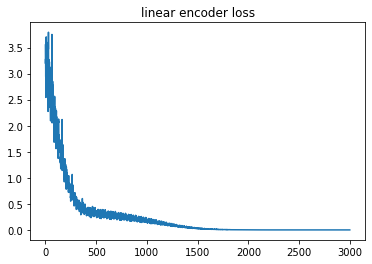

In [186]:
plt.plot(np.arange(len(losses)), losses)
plt.title('linear encoder loss')

In [187]:
color_palette = sns.color_palette('Set2')

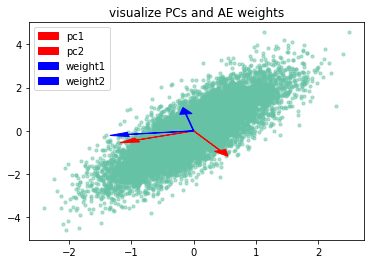

In [188]:
# compare with PCs
data_norm = (f_value - np.mean(f_value)) / (np.std(f_value))
val, vec = pca(f_value, method='eigen')
enc_w = model.enc_layer.weight.detach().cpu().numpy()
#print(vec)
#print(enc_w)

#plt.figure(figsize=(24,18))
plt.scatter(data_norm[:,0], data_norm[:,1], alpha=0.5, color=color_palette[0], s=10)
plt.arrow(0,0,vec[0][0],vec[0][1], width=0.01, head_width=0.2, color='red', label='pc1')
plt.arrow(0,0,vec[1][0],vec[1][1], width=0.01, head_width=0.2, color='red', label='pc2')
plt.arrow(0,0,enc_w[0,0],enc_w[0,1], width=0.01, head_width=0.2, color='blue', label='weight1')
plt.arrow(0,0,enc_w[1,0],enc_w[1,1], width=0.01, head_width=0.2, color='blue', label='weight2')
plt.title('visualize PCs and AE weights')
plt.legend()
#plt.savefig('Q3-2.png')

plt.savefig('Q3-2-linear.png')

C:\Users\leehy\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


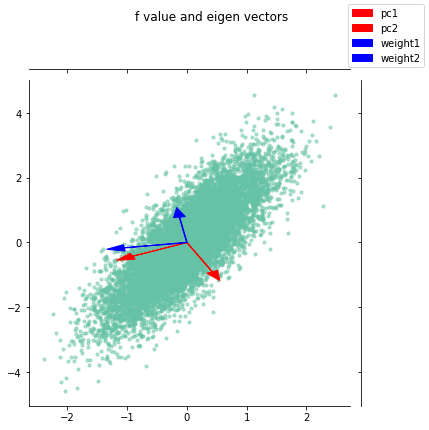

In [189]:
color_palette = sns.color_palette('Set2')
data_norm = (f_value - np.mean(f_value)) / (np.std(f_value))
val, vec = pca(data_norm, method='eigen')
enc_w = model.enc_layer.weight.detach().cpu().numpy()
grid = sns.JointGrid(data_norm[:,0], data_norm[:,1], palette='Set2')
grid.plot_joint(plt.scatter, color=color_palette[0], alpha=0.5, s=10)
plt.arrow(0,0,vec[0][0],vec[0][1], width=0.01, head_width=0.2, color='red', label='pc1')
plt.arrow(0,0,vec[1][0],vec[1][1], width=0.01, head_width=0.2, color='red', label='pc2')
plt.arrow(0,0,enc_w[0,0],enc_w[0,1], width=0.01, head_width=0.2, color='blue', label='weight1')
plt.arrow(0,0,enc_w[1,0],enc_w[1,1], width=0.01, head_width=0.2, color='blue', label='weight2')
#plt.title('f value and eigen vectors')
grid.fig.suptitle('f value and eigen vectors')
grid.fig.legend()
plt.savefig('Q3-AE&PCA.png')